<h1 style="color: #cc99ff">Deep Neural net with forward and back propagation from scratch – Python</h1>

This article aims to implement a deep neural network from scratch. We will implement a deep neural network containing a hidden layer with four units and one output layer. The implementation will go from very scratch and the following steps will be implemented.
Algorithm:

1. Visualizing the input data
2. Deciding the shapes of Weight and bias matrix
3. Initializing matrix, function to be used
4. Implementing the forward propagation method
5. Implementing the cost calculation
6. Backpropagation and optimizing
7. prediction and visualizing the output
Architecture of the model:
The architecture of the model has been defined by the following figure where the hidden layer uses the Hyperbolic Tangent as the activation function while the output layer, being the classification problem uses the sigmoid function.

<h3 style="color: #000fff"><b>Architecture Model<b></h3>

<img src="Markdown_images/model_visulai.jpg">

<h4><b>Weights and bias</b></h4>
The weights and the bias that is going to be used for both the layers have to be declared initially and also among them the weights will be declared randomly in order to avoid the same output of all units, while the bias will be initialized to zero. The calculation will be done from the scratch itself and according to the rules given below where W1, W2 and b1, b2 are the weights and bias of first and second layer respectively. Here A stands for the activation of a particular layer.
<img src="Markdown_images/picture.png">

<h4><b>Cost Function</b></h4>
The cost function of the above model will pertain to the cost function used with logistic regression. Hence, in this tutorial we will be using the cost function:
<img src="Markdown_images/Screenshot 2023-08-24 155616.png">

<h3 style="color: #000fff"><b>Implementation<b></h3>

In [1]:
#Importing Packages and Utilities
import numpy as np
import matplotlib.pyplot as plt
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset



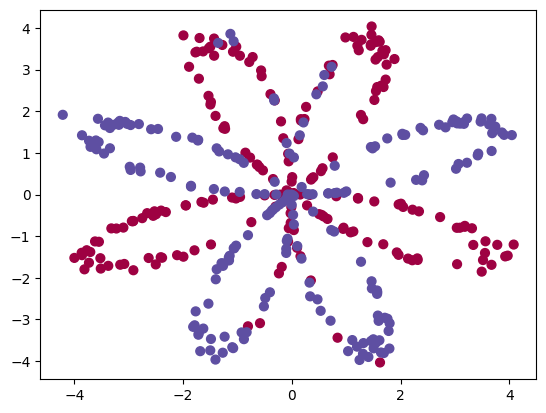

In [2]:
# Load and visualize the dataset
X, Y = load_planar_dataset()
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()


<h3>Code: Initializing the Weight and bias matrix</h3>
Here is the number of hidden units is four, so, the W1 weight matrix will be of shape (4, number of features) and bias matrix will be of shape (4, 1) which after broadcasting will add up to the weight matrix according to the above formula. Same can be applied to the W2.

In [3]:
# Define the network architecture and initialize parameters
def initialize_parameters():
    np.random.seed(2)
    W1 = np.random.randn(4, X.shape[0]) * 0.01
    b1 = np.zeros((4, 1))
    W2 = np.random.randn(Y.shape[0], 4) * 0.01
    b2 = np.zeros((Y.shape[0], 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters


<h3>Code: Forward Propagation :</h3>
Now we will perform the forward propagation using the W1, W2 and the bias b1, b2. In this step the corresponding outputs are calculated in the function defined as forward_prop.

In [4]:
# Forward propagation
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

<h3><b>Calculating Cost Functions<b></h3>

In [5]:
# Compute the cost
def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    cost = np.squeeze(cost)
    return cost

<h3>Code: Finally back-propagating function:</h3>
This is a very crucial step as it involves a lot of linear algebra for implementation of backpropagation of the deep neural nets. The Formulas for finding the derivatives can be derived with some mathematical concept of linear algebra, which we are not going to derive here. Just keep in mind that dZ, dW, db are the derivatives of the Cost function w.r.t Weighted sum, Weights, Bias of the layers.
Assuming you have:

Z: Weighted sum of inputs for a layer.
A_prev: Activation values from the previous layer.
dZ: Gradient of the cost function with respect to Z for the current layer.
m: Number of training examples in the batch.
Then the formulas for backpropagation for a single layer are as follows:

Calculate the gradient of the cost function with respect to the weighted sum (Z) of the current layer:<br>
<b>dZ = dCost / dZ = (1/m) * dLoss / dZ</b><br>
Here, dCost represents the gradient of the overall cost function with respect to the current layer's weighted sum Z. dLoss could be the derivative of a specific loss function like mean squared error, cross-entropy, etc.

Calculate the gradient of the cost function with respect to the weights (W) of the current layer:<br>
<b>dW = dCost / dW = dCost / dZ * dZ / dW = dZ * dA_prev</b><br>
Here, A_prev is the activation values from the previous layer, and ^T represents the transpose operation.

Calculate the gradient of the cost function with respect to the bias (b) of the current layer:<br>
<b>dW = dCost / dW = (1/m) * dZ * A_prev^T</b><br>
The sum(dZ) operation sums up the dZ values for each example in the batch.

Calculate the gradient of the cost function with respect to the activation values of the previous layer:<br>
<b>db = dCost / db = (1/m) * sum(dZ)</b><br>
The sum(dZ) operation sums up the dZ values for each example in the batch.

Calculate the gradient of the cost function with respect to the activation values of the previous layer:<br>
<b>dA_prev = dCost / dA_prev = W^T * dZ</b><br>




In [6]:
# Backward propagation
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [7]:
# Update parameters
def update_parameters(parameters, grads, learning_rate=0.01):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

<h3 style="color:green"><b>Explanation of the above function</b></h3>
<p>This code appears to be an implementation of the backpropagation algorithm for training a neural network with two layers (a shallow neural network). It updates the weights and biases of the network's layers (W1, b1, W2, b2) based on the gradient of the loss with respect to these parameters. Let's break down the code step by step:

1. `A1` and `A2` are obtained from the `cache` dictionary. These are the activation outputs of the first and second layers of the neural network, respectively. These activations are stored during the forward pass of the neural network.

2. `dZ2` is calculated as the derivative of the loss with respect to the activations of the second layer, which is represented as `A2 - Y`, where `Y` is the true target values.

3. `dW2` is computed as the gradient of the loss with respect to the weights of the second layer (`W2`). It is calculated by multiplying `dZ2` by the transpose of `A1` and then normalizing by the number of examples `m`.

4. `db2` represents the gradient of the loss with respect to the biases of the second layer (`b2`). It is computed by taking the sum of `dZ2` along the rows (axis=1) and then normalizing by `m`.

5. `dZ1` represents the derivative of the loss with respect to the activations of the first layer. It is computed by applying backpropagation, which involves multiplying the transpose of `W2` by `dZ2` and then element-wise multiplying it by `(1 - np.power(A1, 2))`, which is the derivative of the hyperbolic tangent (tanh) activation function.

6. `dW1` is calculated as the gradient of the loss with respect to the weights of the first layer (`W1`). It is computed by multiplying `dZ1` by the transpose of the input data `X` and then normalizing by `m`.

7. `db1` represents the gradient of the loss with respect to the biases of the first layer (`b1`). It is computed by taking the sum of `dZ1` along the rows (axis=1) and then normalizing by `m`.

8. Finally, the code updates the parameters (`W1`, `W2`, `b1`, `b2`) using gradient descent. It subtracts the product of the learning rate and the corresponding gradients from the current values of the parameters. This step is essential for iteratively optimizing the network's parameters during training.

In summary, this code snippet calculates the gradients of the loss function with respect to the parameters of a two-layer neural network and then updates these parameters using the gradients and a learning rate. This process is repeated iteratively (typically through multiple epochs) to train the neural network.</p>

Cost after epoch 0: 0.693048
Cost after epoch 10: 0.693043
Cost after epoch 20: 0.693038
Cost after epoch 30: 0.693032
Cost after epoch 40: 0.693026
Cost after epoch 50: 0.693020
Cost after epoch 60: 0.693014
Cost after epoch 70: 0.693008
Cost after epoch 80: 0.693002
Cost after epoch 90: 0.692995
Cost after epoch 100: 0.692988
Cost after epoch 110: 0.692981
Cost after epoch 120: 0.692973
Cost after epoch 130: 0.692966
Cost after epoch 140: 0.692958
Cost after epoch 150: 0.692950
Cost after epoch 160: 0.692941
Cost after epoch 170: 0.692932
Cost after epoch 180: 0.692923
Cost after epoch 190: 0.692914
Cost after epoch 200: 0.692904
Cost after epoch 210: 0.692894
Cost after epoch 220: 0.692883
Cost after epoch 230: 0.692872
Cost after epoch 240: 0.692861
Cost after epoch 250: 0.692849
Cost after epoch 260: 0.692837
Cost after epoch 270: 0.692824
Cost after epoch 280: 0.692811
Cost after epoch 290: 0.692797
Cost after epoch 300: 0.692783
Cost after epoch 310: 0.692768
Cost after epoch 32

Cost after epoch 940: 0.689597
Cost after epoch 950: 0.689491
Cost after epoch 960: 0.689384
Cost after epoch 970: 0.689274
Cost after epoch 980: 0.689162
Cost after epoch 990: 0.689048
Cost after epoch 1000: 0.688933
Cost after epoch 1010: 0.688815
Cost after epoch 1020: 0.688695
Cost after epoch 1030: 0.688574
Cost after epoch 1040: 0.688451
Cost after epoch 1050: 0.688326
Cost after epoch 1060: 0.688200
Cost after epoch 1070: 0.688071
Cost after epoch 1080: 0.687942
Cost after epoch 1090: 0.687811
Cost after epoch 1100: 0.687678
Cost after epoch 1110: 0.687544
Cost after epoch 1120: 0.687409
Cost after epoch 1130: 0.687272
Cost after epoch 1140: 0.687134
Cost after epoch 1150: 0.686996
Cost after epoch 1160: 0.686856
Cost after epoch 1170: 0.686716
Cost after epoch 1180: 0.686574
Cost after epoch 1190: 0.686432
Cost after epoch 1200: 0.686289
Cost after epoch 1210: 0.686146
Cost after epoch 1220: 0.686002
Cost after epoch 1230: 0.685858
Cost after epoch 1240: 0.685713
Cost after epo

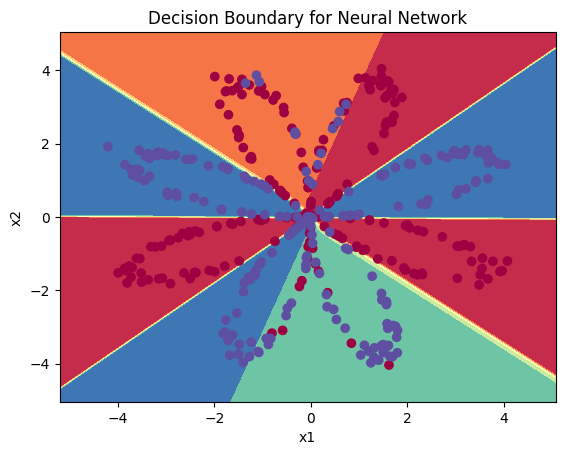

In [8]:
# Neural network model
def nn_model(X, Y, num_epochs=400000000000, print_cost=False):
    np.random.seed(3)
    parameters = initialize_parameters()
    
    for i in range(num_epochs):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 10 == 0:
            print("Cost after epoch %i: %f" % (i, cost))
    
    return parameters

# Train the neural network
parameters = nn_model(X, Y, num_epochs=400000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: forward_propagation(x.T, parameters)[0].T, X, Y)
plt.title("Decision Boundary for Neural Network")
plt.show()